In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

data = pd.read_csv("Finance_data.csv")

In [9]:


missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64


In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score



categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le




numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


target = 'Mutual_Funds'
features = data.drop(columns=[target])
X = features
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42, n_estimators=100)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 1.966279069767442
R-squared Score: -1.2261265822784808


In [11]:
#import matplotlib.pyplot as plt


#plt.figure(figsize=(8, 6))
#plt.hist(data['Mutual_Funds'], bins=20, color='blue', alpha=0.7, edgecolor='black')
#plt.title('Distribution of Mutual Fund Investments')
#plt.xlabel('Investment Amount (Standardized)')
#plt.ylabel('Frequency')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()


#pie_data = data['Gender'].value_counts()  # Get counts for each category
#plt.figure(figsize=(8, 6))
#plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange'])
#plt.title('Gender Distribution in Dataset')
#plt.show()


feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

C:\Users\Hassan Laptop Point\AppData\Local\Temp\ipykernel_15364\1239066234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


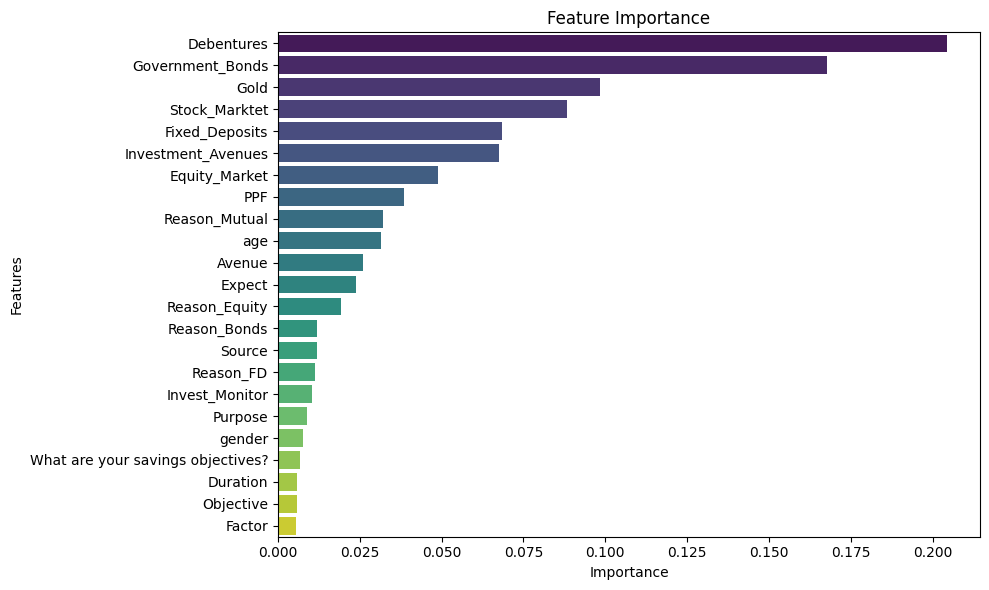

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

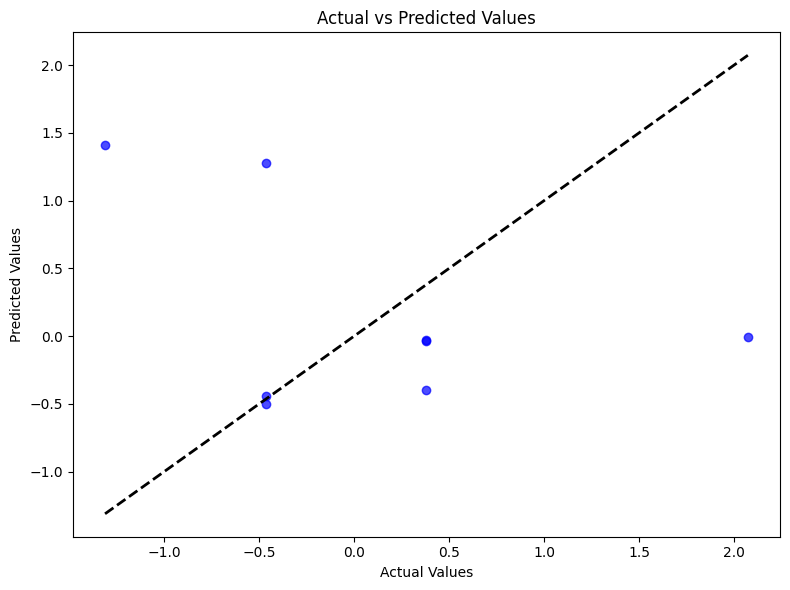

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

In [14]:
processed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

print("Data cleaning, feature engineering, model training, and visualization complete.")

Data cleaning, feature engineering, model training, and visualization complete.
